# Comparación Pandas vs. Dask

In [2]:
import dask.dataframe as dd
from dask.distributed import Client
import pandas as pd
import time
import os
import glob

Lectura de archivos

In [3]:
#Pandas
start_timeP = time.time()
file_paths = glob.glob(os.path.join("data", "nycflights", "*.csv"))
df = pd.concat(
    [pd.read_csv(file, 
                 dtype={'CRSElapsedTime': 'float64', 'TailNum': 'object', 'Cancelled':'bool'}) for file in file_paths],
                 ignore_index=True) #Lectura de cada uno de los archivos csv como distintos df y luego los concatena

pandas_time = print("Pandas se tardo: ", {time.time()-start_timeP})

Pandas se tardo:  {3.1244428157806396}


In [ ]:

#Dask
start_timeD = time.time()
dtype={'CRSElapsedTime': 'float64', 'TailNum': 'object', 'Cancelled':'bool'}
ddf = dd.read_csv("data/nycflights/*.csv", dtype=dtype)
dask_time = print("Dask se tardo: ", {time.time()-start_timeD})


Dask se tardo:  {0.05045938491821289}


Notar que Dask puede leer varios archivos con un solo comando, sin la necesidad de utiliza un ciclo.

In [ ]:
#Cantidad de filas en el data set
len(df)

2611892

In [ ]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled               bool
Diverted               int64
dtype: object

Groups By

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


Pandas se tardo:  {0.14318203926086426}
Dask se tardo:  {0.007949113845825195}


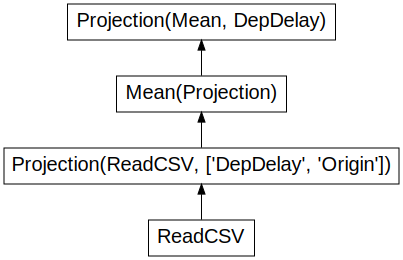

In [ ]:
#Los aeropuerto ue tiene mas demoras en promedio?

#Pandas
start_timeP = time.time()
df_retrasos = df.groupby("Origin").DepDelay.mean()
pandas_time = print("Pandas se tardo: ", {time.time()-start_timeP})
#Dask
start_timeD = time.time()
ddf_retrasos = ddf.groupby("Origin").DepDelay.mean()
pandas_time = print("Dask se tardo: ", {time.time()-start_timeD})
ddf_retrasos.visualize() #Muestra la partición en Dask

In [ ]:
#Vuelos cancelados por día de la semana 
#Pandas
start_timeP = time.time()
df_vuelosCancelados = df[df['Cancelled'] == True].groupby('DayOfWeek').count().Cancelled
pandas_time = print("Pandas se tardo: ", {time.time()-start_timeP})

#Dask
start_timeD = time.time()
ddf_vuelosCancelados = ddf[ddf['Cancelled'] == True].groupby('DayOfWeek').count().Cancelled
pandas_time = print("Dask se tardo: ", {time.time()-start_timeD})


Pandas se tardo:  {0.03867793083190918}
Pandas se tardo:  {0.010017156600952148}


## Aplicar las funciones

In [ ]:
#Agregarle 100 a toda la columna de distancia con una función Aplly 
#Pandas
start_timeP = time.time()
df["Distance"].apply(
    lambda x: x + 100
) 
print("Pandas se tardo: ", {time.time()-start_timeP})

#Dask
start_timeD = time.time()
ddf["Distance"].apply(
    lambda x: x + 100, meta=('x','float')
) 
print("Dask se tardo: ", {time.time()-start_timeD})


Pandas se tardo:  {0.3326389789581299}
Dask se tardo:  {0.0007638931274414062}


Agregar y eliminar columnas

In [ ]:
#Agregar retraso total  en otra columna
#Pandas
start_timeP = time.time()
df['Total retraso'] = df['ArrDelay'] + df['DepDelay']
print("Pandas se tardo: ", {time.time()-start_timeP})

#Dask
start_timeD = time.time()
ddf['Total retraso'] = ddf['ArrDelay'] + ddf['DepDelay']
print("Dask se tardo: ", {time.time()-start_timeD})

Dask se tardo:  {0.0760498046875}
Dask se tardo:  {0.003607034683227539}


In [ ]:
#Eliminar columnas
#Pandas
start_timeP = time.time()
df = df.drop(columns=['AirTime', 'TaxiIn'])
print("Pandas se tardo: ", {time.time()-start_timeP})
#Dask
start_timeD = time.time()
ddf = ddf.drop(columns=['AirTime', 'TaxiIn'])
print("Dask se tardo: ", {time.time()-start_timeD})


Pandas se tardo:  {0.3361799716949463}
Dask se tardo:  {0.001226186752319336}


In [ ]:
#Concatenar Columnas: Juntamos Toda la fecha en una columna
#Pandas
start_timeP = time.time()
df['fecha'] = df['DayofMonth'].astype(str) + '/' + df['Month'].astype(str) + '/' + df['Year'].astype(str)
print("Pandas se tardo: ", {time.time()-start_timeP})
#Dask
start_timeD = time.time()
ddf['fecha'] = ddf['DayofMonth'].astype(str) + '/' + ddf['Month'].astype(str) + '/' + ddf['Year'].astype(str)
print("Dask se tardo: ", {time.time()-start_timeD})

Pandas se tardo:  {1.2723782062530518}
Dask se tardo:  {0.0027670860290527344}


In [ ]:
ddf = ddf.drop(columns=['Year', 'Month', 'DayofMonth'])
df = df.drop(columns=['Year', 'Month', 'DayofMonth'])
ddf = ddf.drop(columns=['DepTime', 'ArrTime'])
df = df.drop(columns=['DepTime', 'ArrTime'])

Cambiar tipo de dato

In [ ]:
#Pandas
start_timeP = time.time()
df['fecha'] = dd.to_datetime(df['fecha'], format='%d/%m/%Y')
print("Pandas se tardo: ", {time.time()-start_timeP})
#Dask
start_timeD = time.time()
ddf['fecha'] = dd.to_datetime(ddf['fecha'],format='%d/%m/%Y')
print("Dask se tardo: ", {time.time()-start_timeD})

Pandas se tardo:  {0.533721923828125}
Dask se tardo:  {0.005429983139038086}


In [ ]:
# Convertir la columna 'CRSDepTime' a tipo entero
ddf['CRSDepTime'] = ddf['CRSDepTime'].astype('int')
df['CRSDepTime'] = df['CRSDepTime'].astype('int')
ddf['CRSArrTime'] = ddf['CRSArrTime'].astype('int')
df['CRSArrTime'] = df['CRSArrTime'].astype('int')


In [ ]:

#Dask
start_timeD = time.time()
ddf['CRSDepTime'] = dd.to_datetime(ddf['CRSDepTime'], format='%H%M')
print("Dask se tardo: ", {time.time()-start_timeD})

Dask se tardo:  {0.010744094848632812}


In [ ]:
#Pandas
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: f'{int(x):04d}')
start_timeD = time.time()
# Convertir CRSDepTime en formato 'HHMM' a datetime
df['CRSDepTime'] = pd.to_datetime(df['CRSDepTime'], format='%H%M')

print("Pandas se tardo: ", time.time() - start_timeD)

Pandas se tardo:  0.18915104866027832


In [ ]:
ddf.dtypes

DayOfWeek                    float64
CRSDepTime            datetime64[ns]
CRSArrTime                   float64
UniqueCarrier        string[pyarrow]
FlightNum                    float64
TailNum              string[pyarrow]
ActualElapsedTime            float64
CRSElapsedTime               float64
ArrDelay                     float64
DepDelay                     float64
Origin               string[pyarrow]
Dest                 string[pyarrow]
Distance                     float64
Cancelled                     object
Total retraso                float64
fecha                 datetime64[ns]
dtype: object

In [ ]:
ddf.head()

,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Total retraso,fecha
0,1,1900-01-01 15:40:00,1701,US,33,NaN,86.0,81.0,46.0,41.0,EWR,PIT,319.0,False,87.0,1990-01-01
1,2,1900-01-01 15:40:00,1701,US,33,NaN,73.0,81.0,-1.0,7.0,EWR,PIT,319.0,False,6.0,1990-01-02
2,3,1900-01-01 15:40:00,1701,US,33,NaN,84.0,81.0,9.0,6.0,EWR,PIT,319.0,False,15.0,1990-01-03
3,4,1900-01-01 15:40:00,1701,US,33,NaN,88.0,81.0,9.0,2.0,EWR,PIT,319.0,False,11.0,1990-01-04
4,5,1900-01-01 15:40:00,1701,US,33,NaN,77.0,81.0,5.0,9.0,EWR,PIT,319.0,False,14.0,1990-01-05


In [ ]:
df.dtypes

DayOfWeek                     int64
CRSDepTime           datetime64[ns]
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                    float64
Cancelled                      bool
Total retraso               float64
fecha                datetime64[ns]
dtype: object

## Diferencias comunes

In [5]:
import dask
ddf  = dask.datasets.timeseries()
pdf = ddf.compute()

/Users/andres/Documents/ITAM/Quinto Semestre/Fuentes de datos/proyecto_dask/.venv/lib/python3.12/site-packages/dask_expr/_collection.py:6002: UserWarning: dask_expr does not support the DataFrameIOFunction protocol for column projection. To enable column projection, please ensure that the signature of `func` includes a `columns=` keyword argument instead.
  warnings.warn(


In [11]:
print(f'Pandas shape: {pdf.shape}')
print('---------------------------')
print(f'Dask lazy shape: {ddf.shape}')

Pandas shape: (2592000, 4)
---------------------------
Dask lazy shape: (<dask_expr.expr.Scalar: expr=(Drop(frame=ResetIndex(frame=Assign(frame=RenameFrame(frame=RenameFrame(frame=RenameFrame(frame=ArrowStringConversion(frame=FromMap(d1cdb03)), columns={'id': 'ID'}), columns={'id': 'ID'}), columns={'id': 'ID'}))), columns=['timestamp'])).size() // 4, dtype=int64>, 4)


En Dask, consideran que la buena práctica no es utilizar `inplace` para modificar el nombre de las columnas (y en otras situaciones) por lo que, para renombrar una columna se utiliza `rename`.

In [8]:
print(ddf.columns)
ddf = ddf.rename(columns={'id':'ID'})
ddf.columns

Index(['name', 'ID', 'x', 'y'], dtype='object')


Index(['name', 'ID', 'x', 'y'], dtype='object')

También, el `loc` que es tan usado en pandas, se sustiuye en Dask, en muchos casos, por el `mask/where`.

In [9]:
cond_ddf = (ddf['x']>0.5) & (ddf['x']<0.8)
ddf['y'] = ddf['y'].mask(cond=cond_ddf, other=ddf['y']* 100)
ddf.head(2)

,name,ID,x,y
timestamp,,,,
2000-01-01 00:00:00,Ingrid,923,0.812028,-0.372474
2000-01-01 00:00:01,Frank,1010,-0.516809,0.136673


De igual manera, para "droppear" un índice, en lugar de utilizar `drop=True`, se considera que es buena práctica indicar cuál es el índice que se está tumbando.

In [10]:
ddf = ddf.reset_index()
ddf = ddf.drop(labels=['timestamp'], axis=1 )
ddf.head(2)

,name,ID,x,y
0,Ingrid,923,0.812028,-0.372474
1,Frank,1010,-0.516809,0.136673


#### Caso particular

In [12]:
ddf2 = dask.dataframe.from_pandas(pdf, npartitions=10)
ddf2

,name,id,x,y
npartitions=10,,,,
2000-01-01 00:00:00,string,int64,float64,float64
2000-01-04 00:00:00,...,...,...,...
...,...,...,...,...
2000-01-28 00:00:00,...,...,...,...
2000-01-30 23:59:59,...,...,...,...


Notar que al crear un Dataframe de Dask le pasamos el número de particiones. Esto ayudará a Dask a saber como "trozar" el Dataframe de pandas y poder paralelizar el cómputo, **cada partición es un Dataframe distinto**. 

In [13]:
pdf2 = pdf.reset_index()
pdf2.loc[0]

timestamp    2000-01-01 00:00:00
name                      Ingrid
id                           923
x                       0.812028
y                      -0.372474
Name: 0, dtype: object

In [14]:
ddf2 = ddf2.reset_index()
ddf2.loc[0].compute()

,timestamp,name,id,x,y
0,2000-01-01,Ingrid,923,0.812028,-0.372474
0,2000-01-04,Hannah,1069,-0.176747,0.950680
0,2000-01-07,Ingrid,1039,0.841252,0.582388
0,2000-01-10,Ray,996,0.383479,-0.820516
0,2000-01-13,Wendy,968,0.096200,0.931216
0,2000-01-16,Patricia,991,-0.538522,0.369087
0,2000-01-19,Yvonne,1009,-0.441163,0.878738
0,2000-01-22,Tim,952,0.873414,0.664519
0,2000-01-25,Wendy,1007,-0.371586,0.568942
0,2000-01-28,Laura,1044,-0.391215,-0.424320
